In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Dropout, Conv2D, BatchNormalization, Flatten, Dense, MaxPool2D, Input, Activation, Add, MaxPooling2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanAbsoluteError
import json

In [2]:
fldr = "jangedoo/utkface-new/versions/1/UTKFace"

In [3]:
files = os.listdir(fldr)

In [4]:
ages = []
genders = []
images = []

In [5]:
for f in files:
    age = int(f.split('_')[0])
    ages.append(age)
    gender = int(f.split('_')[1])
    genders.append(gender)
    image = cv2.imread(fldr + '/' + f)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48, 48))
    images.append(image)

In [6]:
images_f  = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [7]:
# Defining labels for the model

labels = []
i = 0
while i < len(ages_f):
    label = []
    label.append(ages_f[i])
    label.append(genders_f[i])
    labels.append(label)
    i += 1

In [8]:
labels_f = np.array(labels)

In [9]:
# Creating another list of images with the pixel values scaled between 0 and 1

images_f_2 = images_f / 255.0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images_f_2, labels_f, test_size=0.25, random_state=42)

In [11]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [12]:
# loading the model

custom_objects = {'mae': MeanAbsoluteError()}

In [13]:
model = load_model('Age_Gender_Detection.h5', custom_objects=custom_objects)

In [14]:
# Recompile with the same optimizer, loss, and metrics used during training
model.compile(optimizer='adam', loss=['binary_crossentropy', 'mae'], metrics=['accuracy', 'accuracy'])

In [15]:
model.evaluate(X_test, y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - age_out_accuracy: 0.0487 - age_out_loss: 6.4919 - gender_out_accuracy: 0.8975 - gender_out_loss: 0.2319 - loss: 7.5320


[7.607919216156006,
 0.24223196506500244,
 6.548908710479736,
 0.047410156577825546,
 0.8940442204475403]

In [16]:
preds = model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [17]:
preds[1]

array([[ 6.832266],
       [51.934193],
       [22.525295],
       ...,
       [68.91166 ],
       [23.23995 ],
       [47.37592 ]], shape=(5927, 1), dtype=float32)

In [18]:
# Load JSON history
with open("training_history.json", "r") as f:
    history = json.load(f)

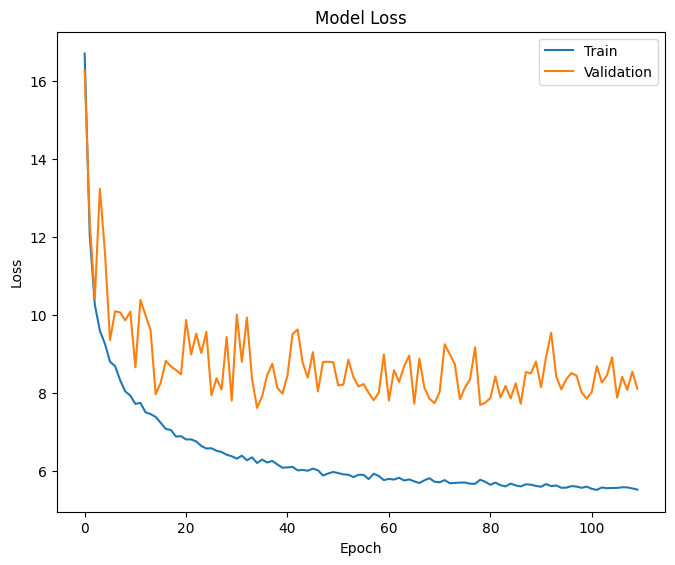

In [20]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplots_adjust(left=0, right=0.95, top=1, bottom=0, hspace=0.25, wspace=0.35)

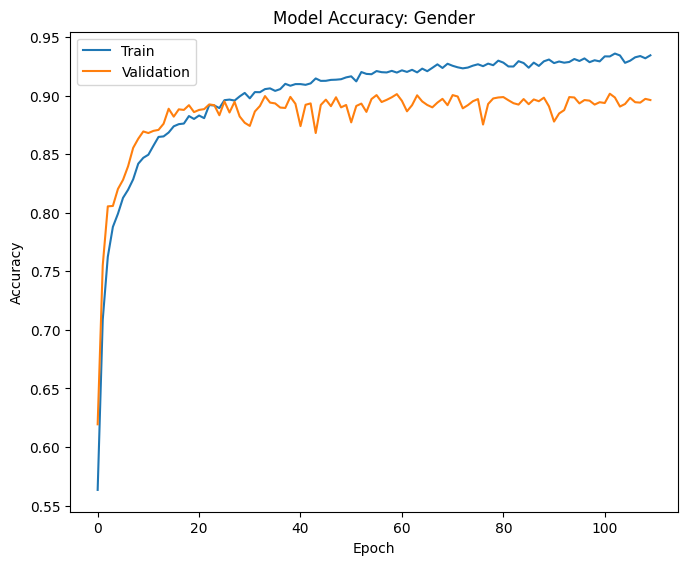

In [23]:
plt.plot(history['gender_out_accuracy'])
plt.plot(history['val_gender_out_accuracy'])
plt.title('Model Accuracy: Gender')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(left=0, right=0.95, top=1, bottom=0, hspace=0.25, wspace=0.35)

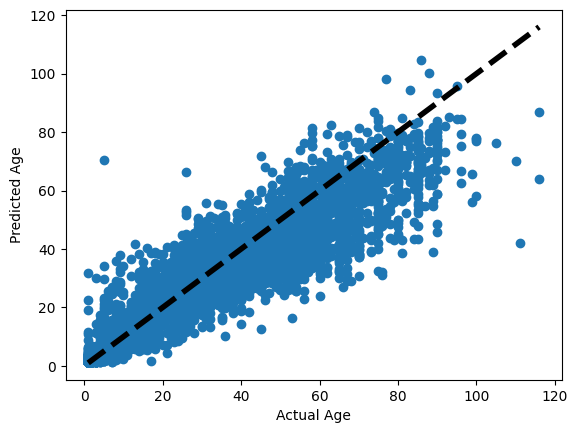

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_test_2[1], preds[1])
ax.plot([y_test_2[1].min(), y_test_2[1].max()], [y_test_2[1].min(), y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()